In [10]:
import requests, StringIO, pandas as pd, json, re

In [11]:
def get_file_content(credentials):
    """For given credentials, this functions returns a StringIO object containing the file content."""

    url1 = ''.join([credentials['auth_url'], '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': credentials['username'],'domain': {'id': credentials['domain_id']},
            'password': credentials['password']}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                if(e2['interface']=='public'and e2['region']==credentials['region']):
                    url2 = ''.join([e2['url'],'/', credentials['container'], '/', credentials['filename']])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO.StringIO(resp2.content)

In [39]:
credentials_2 = {
  'auth_url':'https://identity.open.softlayer.com',
  'project':'object_storage_cb2d0fde_b502_47a8_a001_8fe79c4bcc4d',
  'project_id':'31b17e16caeb40dfb46827b48acf9698',
  'region':'dallas',
  'user_id':'b2fc779b212443da96c1e1026ca7eedd',
  'domain_id':'0e7f87b0fd6c4e9c9d1cdffda4555baf',
  'domain_name':'1141683',
  'username':'admin_f33dd542d9bbf8c19cd250880066bc993ed256ed',
  'password':"""Qre02GIJ1..~gs^H""",
  'filename':'BYAGE&METRO.csv',
  'container':'notebooks',
  'tenantId':'se31-dedd8afad761f5-912ba59f22f5'
}

In [40]:
content_string = get_file_content(credentials_2)
housing_df = pd.read_csv(content_string)

In [41]:
housing_df.head()

,CATEGRORY,AVGLMED,AVGPOV,AVGHHI,AVGMHC
0,30METRO2,72836.6,19092,60785.58,1360.195
1,30METRO3,68176.6,22577,87400.50,1218.600
2,31METRO2,72322.0,19927,69410.94,1207.321
3,31METRO3,66423.4,22777,59778.00,1122.667
4,32METRO2,72821.3,19501,69309.60,1265.921


In [43]:
housing_df = housing_df.set_index(housing_df["CATEGRORY"])
housing_df.drop(['CATEGRORY'], axis=1, inplace=True)
housing_df.head()

,AVGLMED,AVGPOV,AVGHHI,AVGMHC
CATEGRORY,,,,
30METRO2,72836.6,19092,60785.58,1360.195
30METRO3,68176.6,22577,87400.50,1218.600
31METRO2,72322.0,19927,69410.94,1207.321
31METRO3,66423.4,22777,59778.00,1122.667
32METRO2,72821.3,19501,69309.60,1265.921


In [44]:
%matplotlib inline

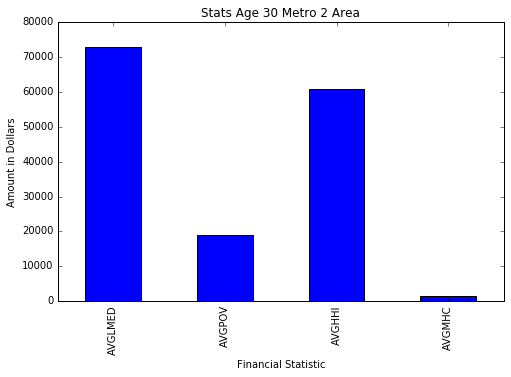

In [47]:
Metro2Age30 = housing_df.ix['30METRO2']
ax = Metro2Age30.plot(kind='bar', figsize=(8,5), title="Stats Age 30 Metro 2 Area")
ax.set_ylabel("Amount in Dollars")
ax.set_xlabel("Financial Statistic");



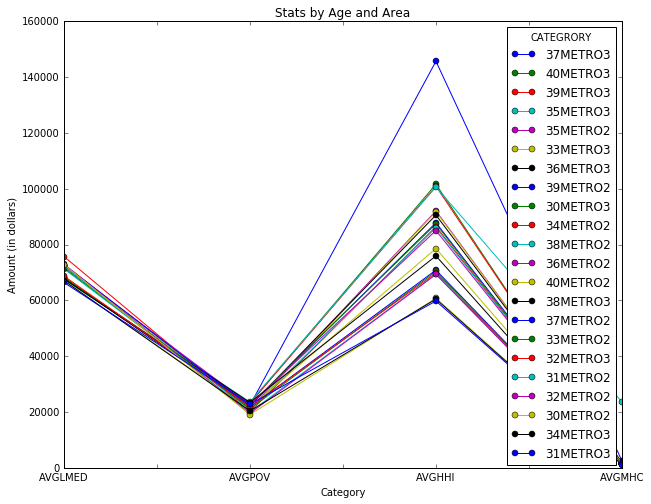

In [56]:
housing_sorted_df = housing_df.sort_values(by="AVGHHI",ascending=False)
categoryView = housing_sorted_df[0:22].transpose()
ax = categoryView.plot(figsize=(10,8), marker='o', linestyle='-', title="Stats by Age and Area")
ax.set_xlabel("Category")
ax.set_ylabel("Amount (in dollars)");